# 합성곱 신경망 (convolution neural network)

-----

CNN (convolution neural network) 은 비전 처리에서 많이 응용되는 기술로 뉴럴 넷트워크에 합성곱 층 (convolution layer)라는 것이 추가된다.

합성곱 신경망은 대뇌의 시각 피질 연구에서 시작되었다고 한다.

Convolution layer는 수학적 operation인 convolution에서 원리를 가져왔으며 이미지 처리에 있어 일종의 필터 역할을 한다.

CNN 기술은 이미지 검색, 자율주행, 영상 분류 그리고 음성 인식과 자연어 처리 등의 분야에서 우수한 성능을 보여 왔다.

이 단원에서는 CNN의 수학적 구조를 자세히 알아보기 보다는 적용 예제 중심으로 내용을 체크해 본다.

## Convolution layer

CNN에서 가장 중요한 것은 합성곱 층 (convolution layer)이다.  

일반적인 인공 신경망처럼 합성곱 층에도 뉴런들이 존재한다.

일반적인 인공 신경망에서 층의 뉴런이 모든 입력과 연결 (fully connected) 되었던 것과는 달리, 합성곱 층의 뉴런은 입력 이미지의 모든 픽셀에 한번에 연결되는 것이 아니다.

합성곱 층 뉴런은 입력된 이미지의 일부, 예를 들어, $3\times3$ 크기의 부분 집합에 있는 픽셀들에만 연결된다.

사람이 전체를 보기 힘든 큰 그림을 볼 때 일부를 먼저 시각적으로 보는 것과 비슷하다.

그 뒤에 순차적으로 $3\times3$ 크기의 이동 가능한 창 (window)를 움직여가며 전체 영역을 모두 스캔한다.

이 window를 종종 **filter** 혹은 **kernel**이라고 부르며, 필터링은 결국 그림에서 중요한 특징을 추출하는 방식이다

Filter를 통해 나온 output은 **특성 맵 (feature map)** 이라고 불린다.

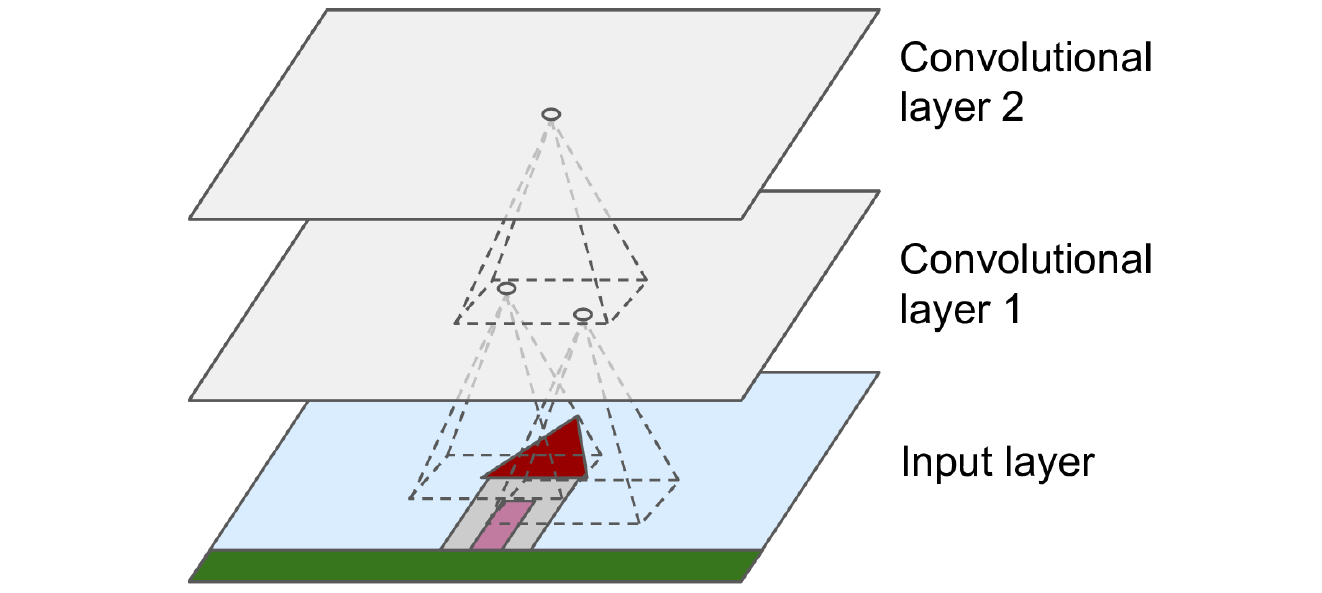

한편, convolution의 기본 계산은 다음과 같다.

아래 그림에서 분홍색으로 색칠된 $x$들과 초록색 필터와의 연산을 거치면 하나의 값이 계산된다.

그 이후에 분홍색 영역을 오른쪽으로 한 칸 평행 이동하여 같은 연산을 수행하면, 또 하나의 값이 계산될 것이다.

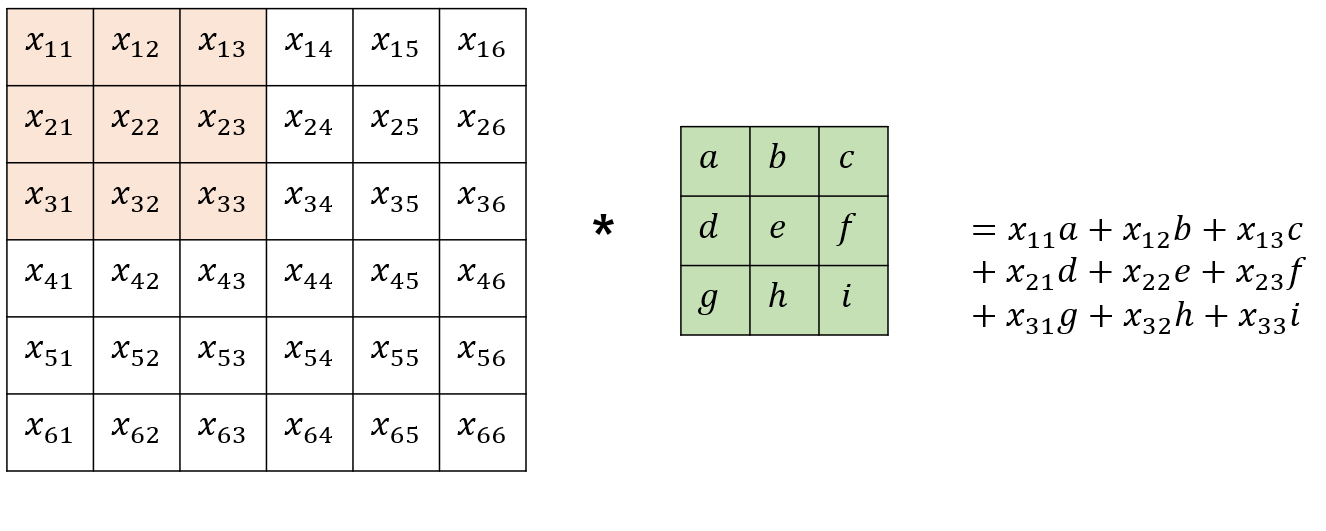

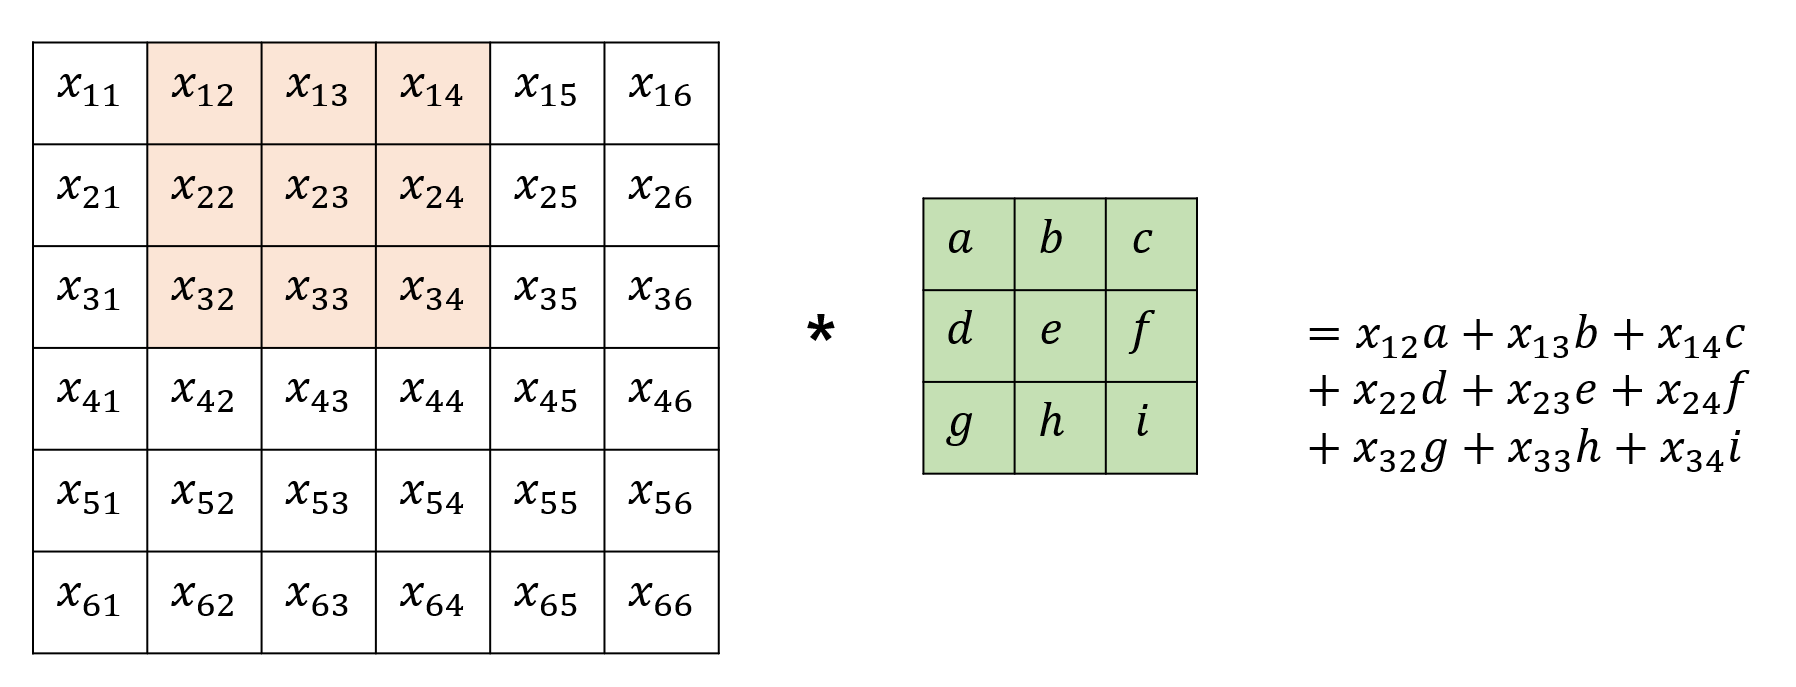

그렇게 가장 오른쪽에 이를 때까지 연산을 반복한다.

가장 오른쪽에 도달하면, 다시 제일 왼쪽으로 돌아와 아래로 한 칸 이동한 후 연산을 수행한다.

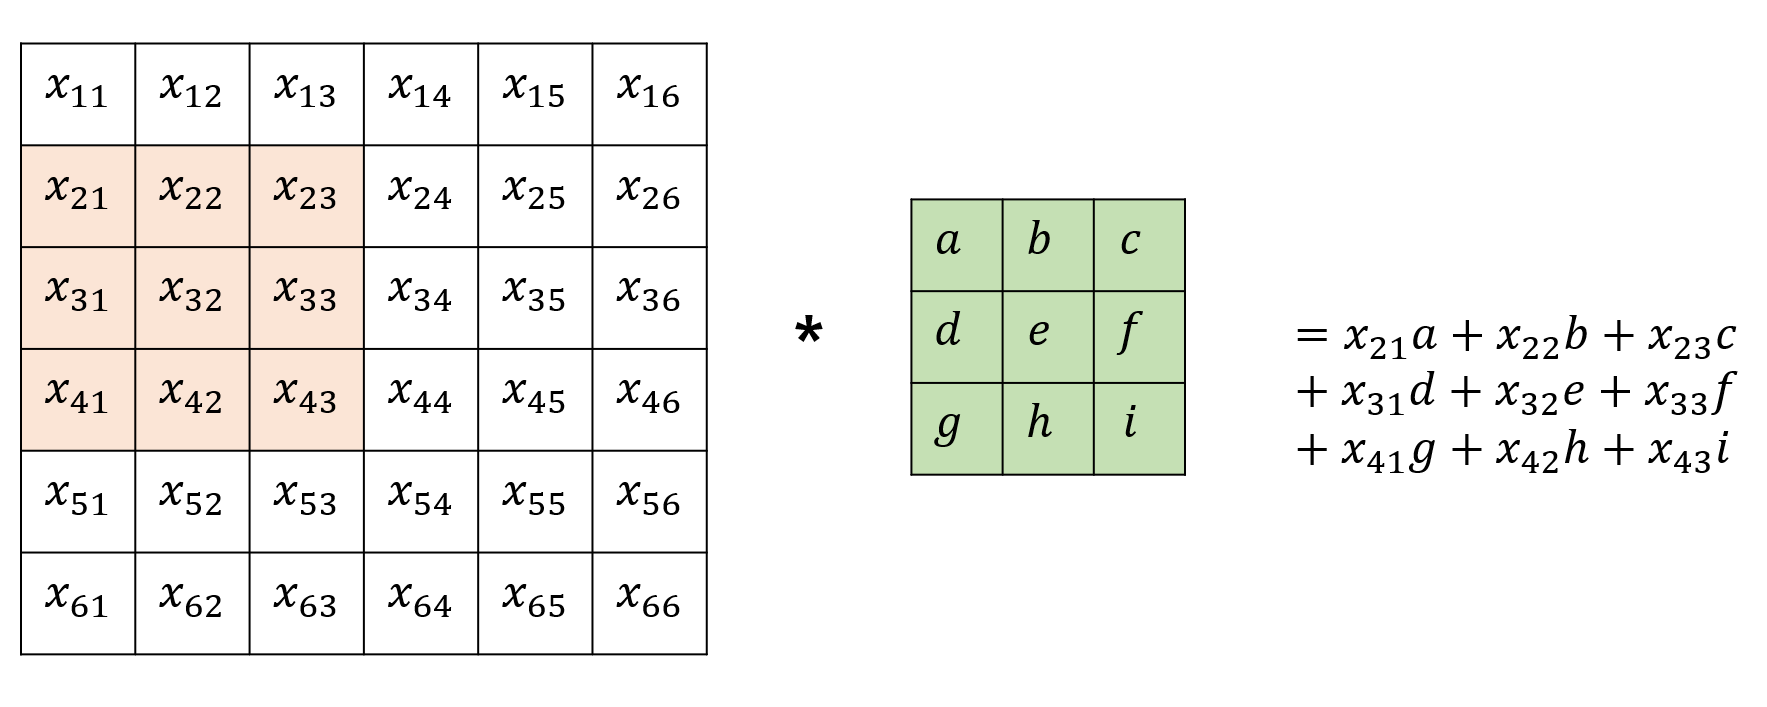

이 과정을 반복하여 $x$들의 가장 오른쪽 아래에 이를 때까지 수행한다. 

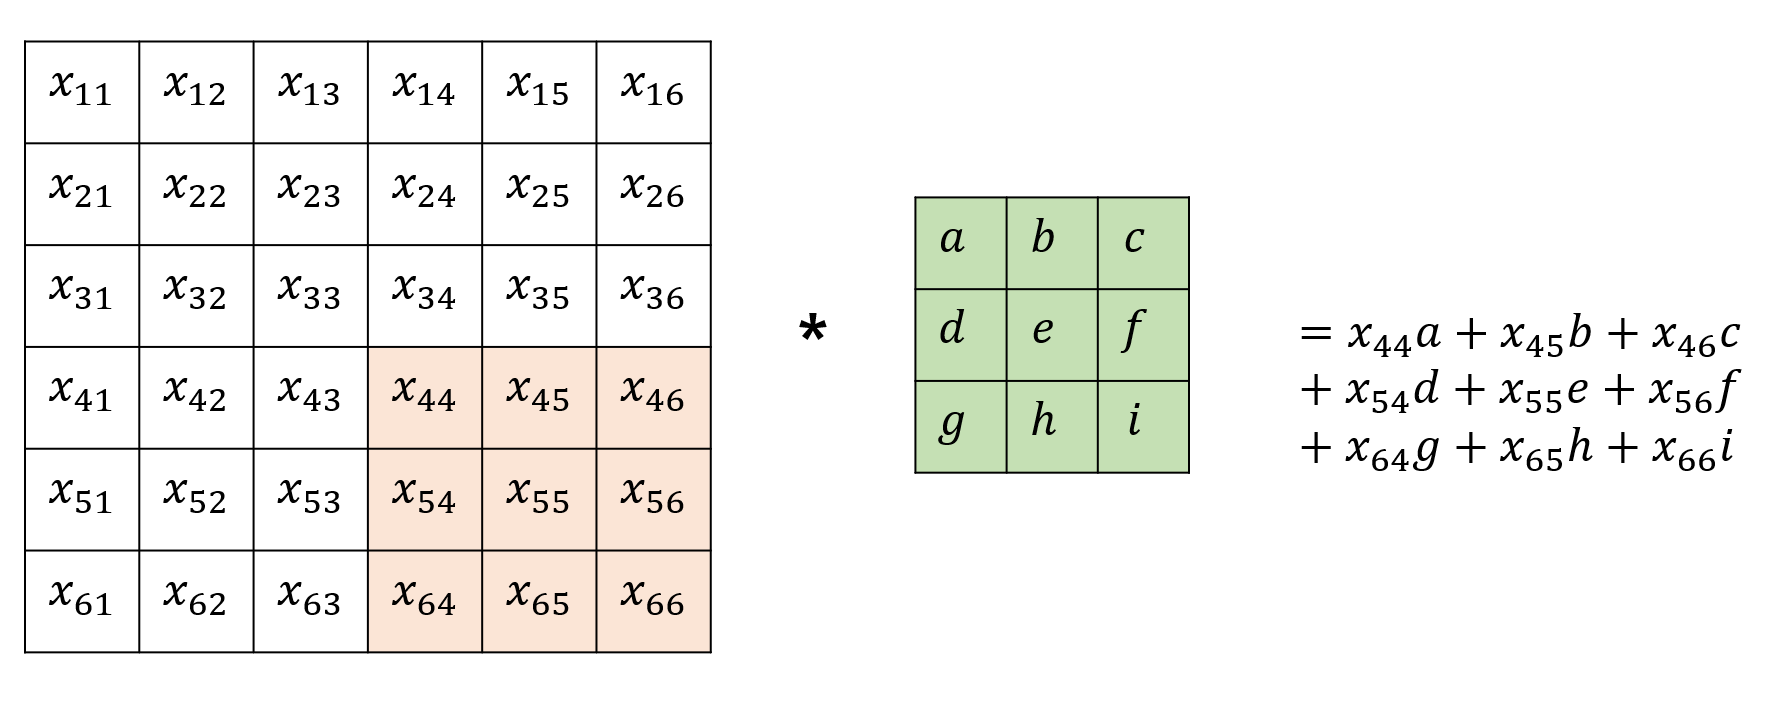

각 과정에서 수행한 값들을 모아 최종 결과를 작성하면 $4 \times 4$의 형태의 output 행렬이 나타남을 주목하라.

- 원본 데이터는 $6 \times 6 \rightarrow$  출력 데이터 $4 \times 4$

#### 여러 개의 필터

하나의 filter가 하나의 특성 (feature)을 추출하며, 여러 특성을 추출하기 위해, 필터의 개수를 여러 개로 늘릴 수 있다.  

만약 2개 이상의 필터를 사용할 경우 각각의 필터가 병렬적으로 입력 데이터와 convolution 연산을 수행한다. 

따라서 $n$개의 필터를 사용하면, $n$개의 output 행렬들 (feature map들)을 얻게 된다.

아래 그림에서는 두 개의 서로 다른 필터가 각각 입력 이미지에 대해 convolution 연산을 수행하므로, 각 필터당 하나씩, 총 2개의 출력 행렬(feature map)이 생성된다.

```
입력 이미지 (6x6)
   └── 필터 1 (3x3) → Feature Map 1 (4x4)
   └── 필터 2 (3x3) → Feature Map 2 (4x4)
```

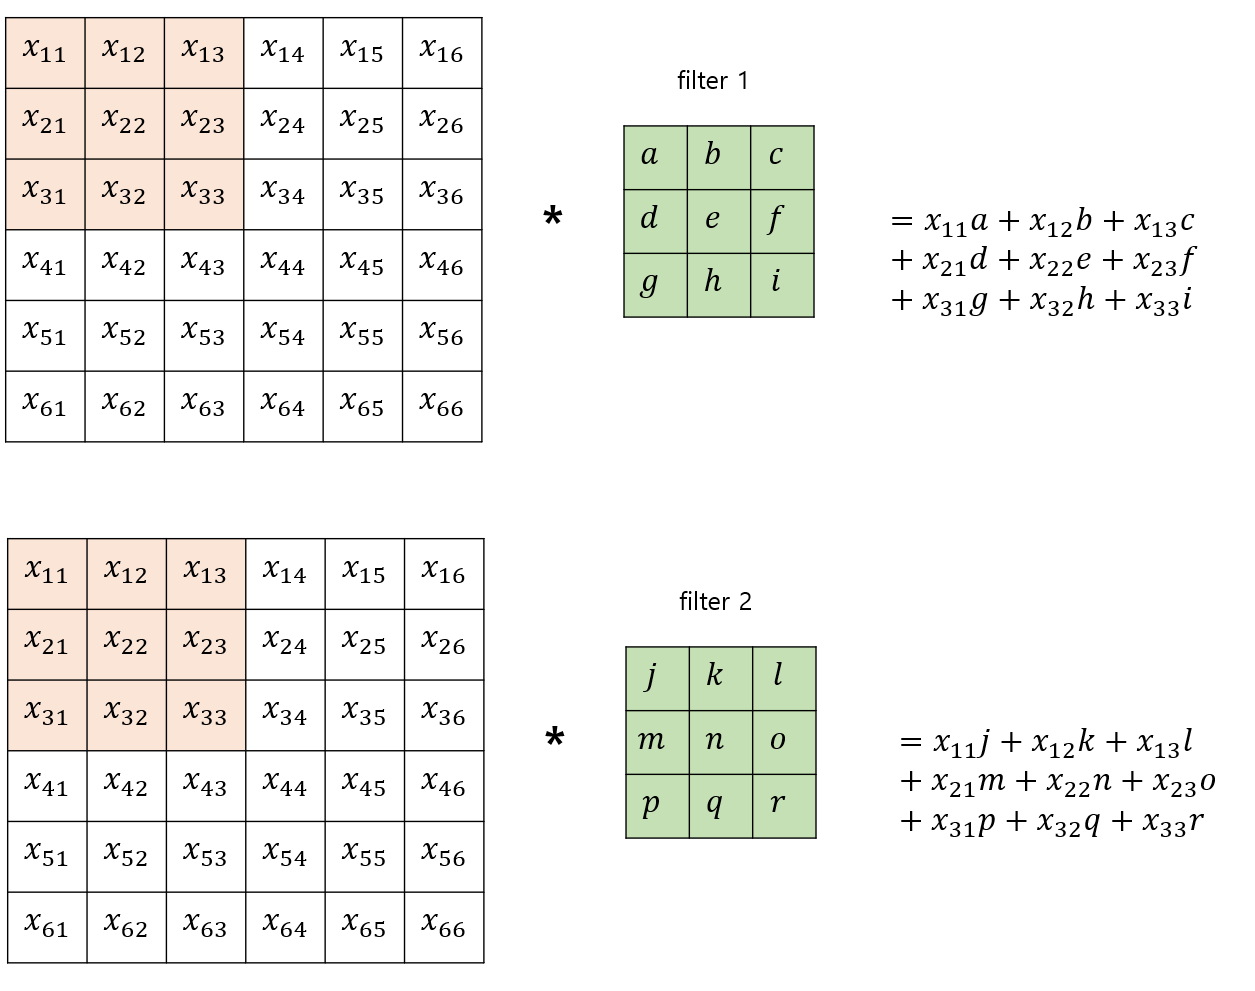

### Bias

Convolution layer의 bias (편향)는 Dense layer의 bias와 마찬가지로, 뉴런의 출력에 더해지는 상수 항이다.

각 필터마다 하나의 bias 값이 존재한다. 예를 들어, filter의 개수가 8이면 bias도 총 8개

즉, 필터의 출력값 (feature map)은 다음과 같이 계산된다.

`output(x,y)=(filter∗input)(x,y)+b`

- bias는 feature map 전체에 동일하게 더해지는 구조

#### 예제

가상의 데이터를 직접 만들어 필터를 적용하는 예제를 수행해 보자.

In [2]:
import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D

In [3]:
# define input data
data = [[0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0], 
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0]]
data = np.asarray(data)

# 1은 데이터의 개수, 8,8은 데이터 하나의 크기, 1은 channel의 숫자, 여기서는 흑백을 의미 (RGB의 경우 3)
# (8, 8, 1)이 input shape이 됨
data = data.reshape(1, 8, 8, 1)  

아래 코드에서 ```Conv2D```의 ```kerne_size``` 인자는 수용장 (convolution window)의 크기를 나타낸다.  
 - $3\times3$이나 $5\times5$ 등의 비교적 작은 크기의 필터가 많이 사용된다.  

아래 코드에서 ```input_shape=(8, 8, 1)```은 입력 데이터의 shape이다. 

- `8,8`은 입력 데이터의 세로와 가로 크기
  
- `1`은 channel의 숫자로, 이미지 데이터의 경우 흑백 그림임을 의미함.

In [4]:
# create model
model = Sequential()
# (3,3) 크기의 필터를 하나 이용
model.add(Conv2D(filters = 1, kernel_size = (3,3), input_shape=(8, 8, 1)))

```filters``` 인자는 필터의 개수, 즉 합성곱 연산에 사용되는 커널의 수를 나타낸다. 

- 이전에 살펴보았듯이 만약 ```filters```의 수가 늘어나면 그만큼 얻어지는 output의 수 (feature map의 수)도 늘어난다.

In [13]:
# 3*3 필터와 1개의 bias
ws, bs = model.layers[0].get_weights()

print("Weights shape:", ws.shape)   # (kernel_height, kernel_width, input_channels, output_channels)
print("Biases shape:", bs.shape)

Weights shape: (3, 3, 1, 1)
Biases shape: (1,)


In [14]:
ws

array([[[[-0.2  ]],

        [[ 0.08 ]],

        [[-0.542]]],


       [[[ 0.253]],

        [[ 0.513]],

        [[ 0.218]]],


       [[[ 0.228]],

        [[ 0.136]],

        [[-0.337]]]], dtype=float32)

In [15]:
bs

array([0.], dtype=float32)

이 예제에서는 필터를 강제로 지정(```detector```)하여 어떤 결과를 얻게 되는지 살펴본다.

아래 필터는 $3\times3$으로 가운데 수직선이 있는 필터이다.  

이런 가중치를 사용한 뉴런은 가운데 수직선 부분을 제외하고는 입력에 모두 0이 곱하지는 셈이며 나머지 부분을 무시하는 것처럼 될 것이다.

In [16]:
# define a vertical line detector
# 가상의 필터로 (3,3,1,1)의 shape을 가지도록 생성
detector = [[[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]]]

weights = [np.asarray(detector), np.asarray([0.0])]   # 3*3 fileter와 편향(bias)
print(weights)

[array([[[[0]],

        [[1]],

        [[0]]],


       [[[0]],

        [[1]],

        [[0]]],


       [[[0]],

        [[1]],

        [[0]]]]), array([0.])]


`set_weights` 메서드를 이용하여 모형에 강제로 weight를 설정해 보자.

In [17]:
# store the weights in the model
model.set_weights(weights)
for layer in model.layers: print(layer.get_weights()) 

[array([[[[0.]],

        [[1.]],

        [[0.]]],


       [[[0.]],

        [[1.]],

        [[0.]]],


       [[[0.]],

        [[1.]],

        [[0.]]]], dtype=float32), array([0.], dtype=float32)]


In [18]:
# apply filter to input data
yhat = model.predict(data)

# 보기 좋게 print 하기 위해
for r in range(yhat.shape[1]):
    # print each column in the row
    print([yhat[0,r,c,0] for c in range(yhat.shape[2])])

1/1 [==============================] - 1s 528ms/step
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]


이번에는 가로 필터를 넣어보겠다.

In [19]:
model2 = Sequential()
model2.add(Conv2D(filters = 1, kernel_size = (3,3), input_shape=(8, 8, 1)))

detector2 = [[[[0]],[[0]],[[0]]],
             [[[1]],[[1]],[[1]]],
             [[[0]],[[0]],[[0]]]]

weights2 = [np.asarray(detector2), np.asarray([0.0])]
model2.set_weights(weights2)
yhat2 = model2.predict(data)
for r in range(yhat2.shape[1]):
    # print each column in the row
    print([yhat2[0,r,c,0] for c in range(yhat2.shape[2])])

1/1 [==============================] - 0s 21ms/step
[0.0, 1.0, 2.0, 2.0, 1.0, 0.0]
[0.0, 1.0, 2.0, 2.0, 1.0, 0.0]
[0.0, 1.0, 2.0, 2.0, 1.0, 0.0]
[0.0, 1.0, 2.0, 2.0, 1.0, 0.0]
[0.0, 1.0, 2.0, 2.0, 1.0, 0.0]
[0.0, 1.0, 2.0, 2.0, 1.0, 0.0]


실제 사진 이미지에 세로 필터와 가로 필터를 적용하면 다음과 같다.

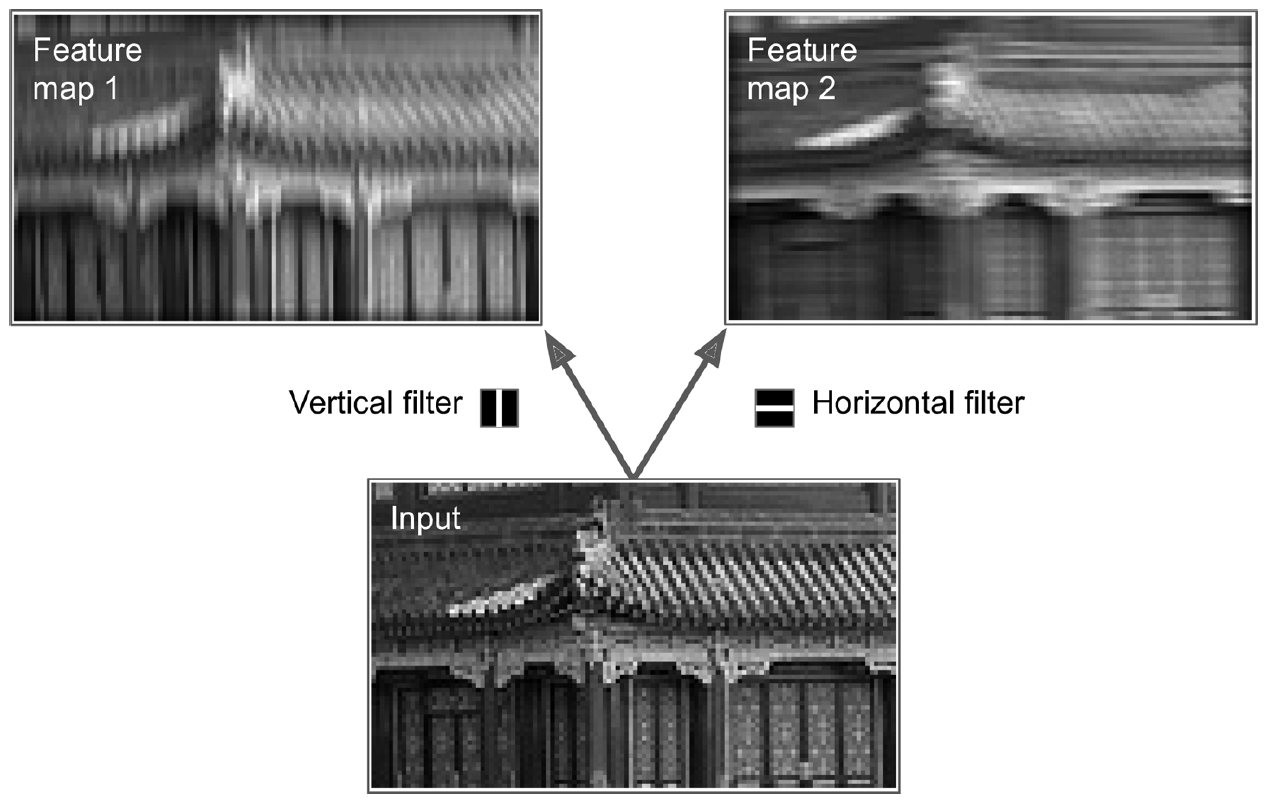

실제 CNN을 구현할 때는 가로 필터나 세로 필터 같은 사용자가 정한 특정 필터를 적용하는 것은 아니다.  
- 필터들의 weight 값은 데이터를 통한 훈련 과정을 거쳐 fitting 된다.

## 필터와 채널의 개수

### 여러 개의 채널

이미지가 RGB 등으로 구성된 경우처럼 입력 데이터에 여러 개의 채널이 존재하면, 합성곱 층에서는 각 채널을 담당하는 별도의 필터 가중치들이 존재하게 된다.

* 예를 들어, RGB 이미지는 3개의 채널(R, G, B)로 구성되며, 데이터의 shape는 보통 `(height, width, channels)` 형식이다.
  
* 여기서 마지막 값이 바로 채널 수이며, 3이 된다.

CNN에서는 하나의 filter가 여러 채널을 모두 동시에 처리할 수 있어야 한다.

이를 위해 필터도 채널 수만큼의 depth를 가지게 되며, 각 채널마다 하나씩의 필터 커널을 갖게 되는 셈이다.

- 즉, 채널 수가 2개이면, 하나의 필터는 2개의 2D 커널로 구성된다.

- 이 각각의 커널은 자신이 담당하는 채널에만 합성곱 연산을 적용한다.

- 각 채널에서의 convolution 결과는 같은 위치끼리 더해져서 하나의 출력 값이 된다.

- 이 결과가 곧 하나의 feature map이 되며, 특성 맵의 수는 위에서 살펴본 바와 동일하게 필터 수만큼 생성된다.


아래는 두 개의 채널이 있는 경우를 표현하는 예제이다.

편의를 위해 위 아래 그림에 같은 notation을 사용했지만 색깔이 다르면 다른 값이라고 간주해야 한다.

- 입력 데이터는 검은 색과 파랜 색 글씨로 표현되는 두 개의 채널이 있다.

- 하나의 필터 내에, 각 채널을 담당하는 $3\times3$ 커널이 있어 convolution 연산이 수행되고, $4\times4$ 결과들이 만들어 진다.
  - 커널 또한 검은색과 파란색 글씨로 구분되어 있다. <br><br>

- 각 커널 별 최종 결과 행렬들은 동일 포지션끼리 합산하여 하나의 특성 맵을 만든다.

```
[입력 채널 1] ---*--kernel1--\
                              \
                               + → output
                              /
[입력 채널 2] ---*--kernel2--/
````

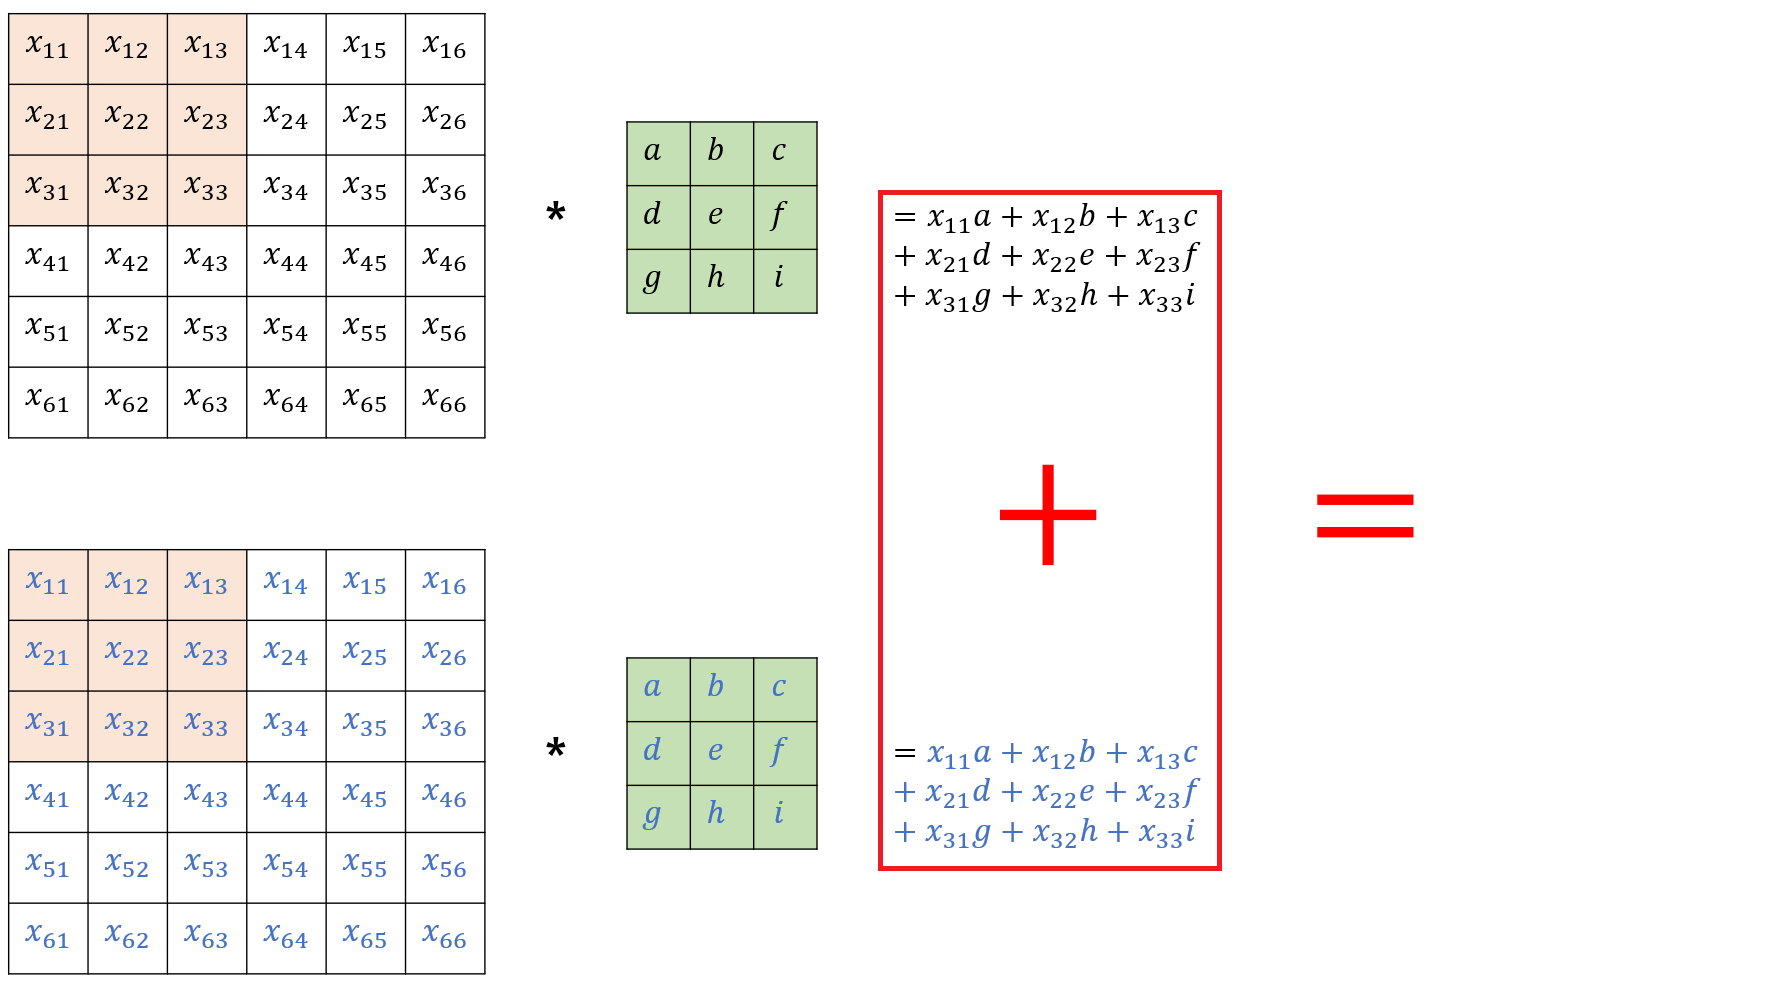

### 여러 개의 채널과 여러 개의 필터

여기에 커널의 개수를 나타내는 `filters`가 $n$이라고 하면, 앞서 설명한 채널별 합성곱 + 채널별 결과 합산의 작업이 필터의 수만큼 병렬적으로 이루어진다.

- 입력 채널마다 해당 필터의 일부 커널이 적용되고,

- 채널별 합성곱 결과는 각 필터 내에서 합산된다.

- 이렇게 계산된 결과가 각 필터당 하나의 feature map을 구성한다

아래 그림에서는 channel의 숫자가 2, filter의 숫자가 2인 경우의 예제이다.

- 입력 데이터: 채널 2개, 각 채널 크기 $6\times6$

- 필터 2개 → 각 필터는 2개의 커널(각 채널당 하나)을 가짐

- 각 필터는 두 채널 각각에 대해 합성곱을 수행하고, 그 결과를 합산하여 하나의 feature map을 생성

- 필터가 2개이므로 최종 출력은 feature map 2개 → output shape = (4, 4, 2)

```
입력 채널 1 ─┬─[필터1 커널1]──┐
            │                ├──► feature map 1
입력 채널 2 ─┴─[필터1 커널2]──┘

입력 채널 1 ─┬─[필터2 커널1]──┐
            │                ├──► feature map 2
입력 채널 2 ─┴─[필터2 커널2]──┘
```

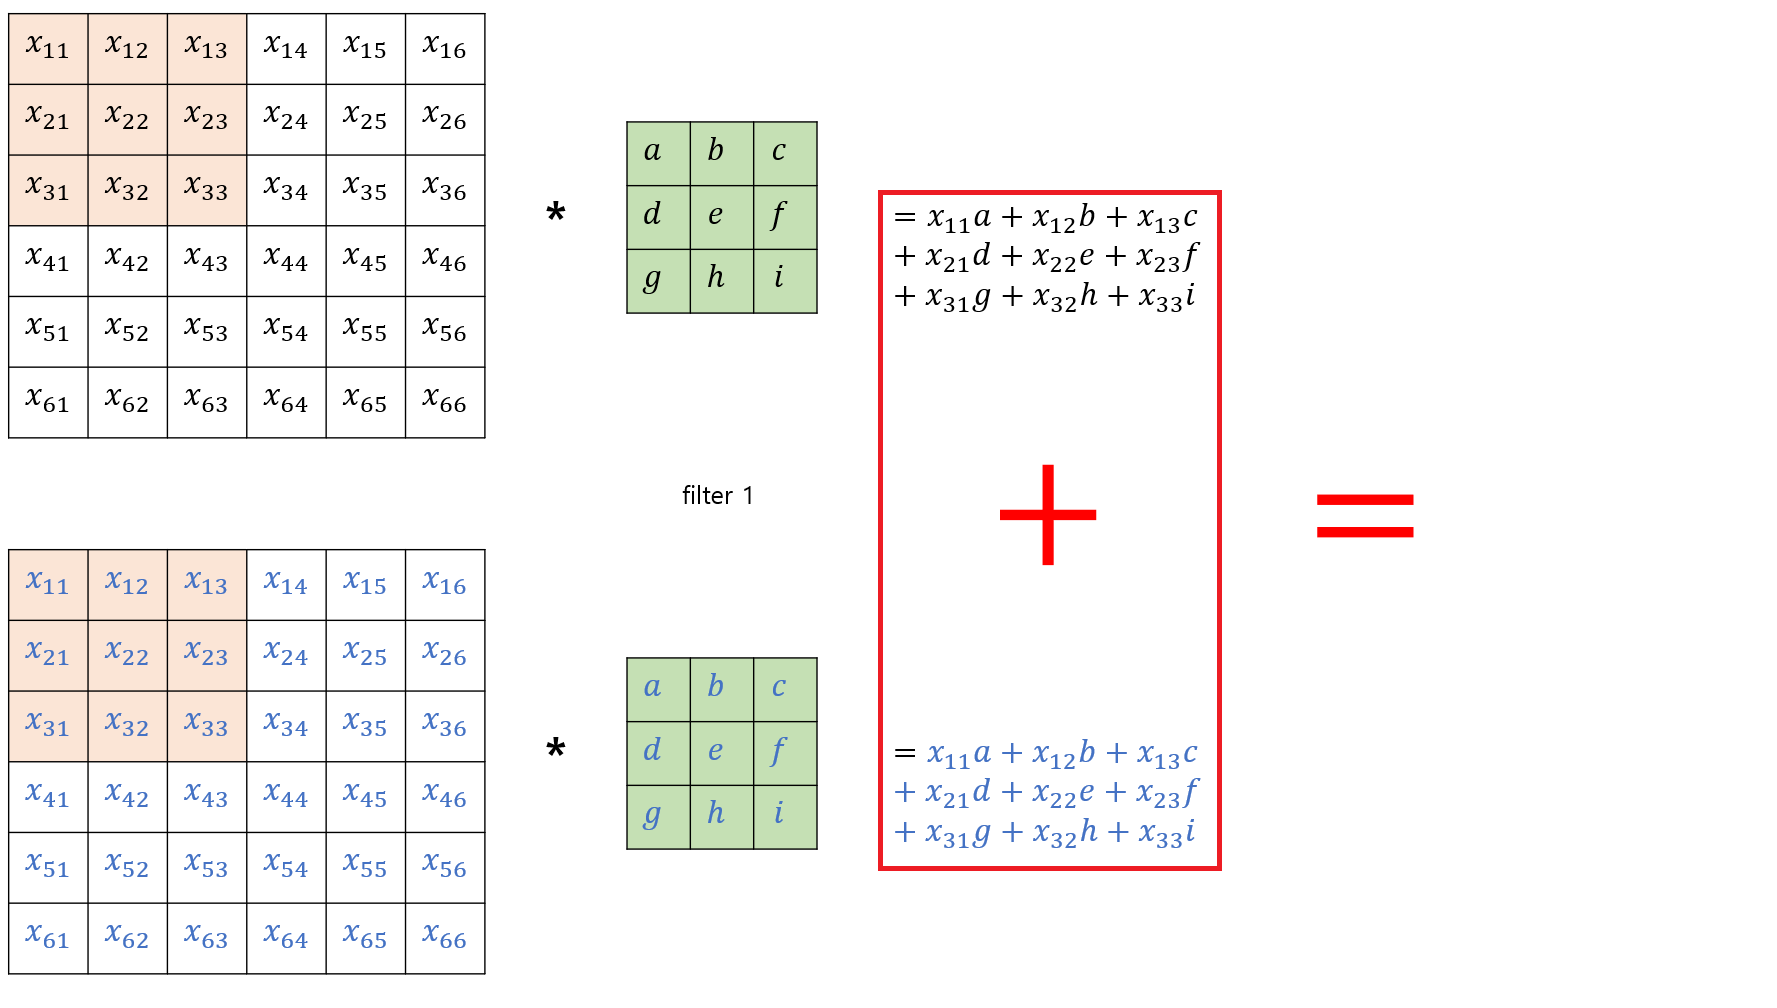

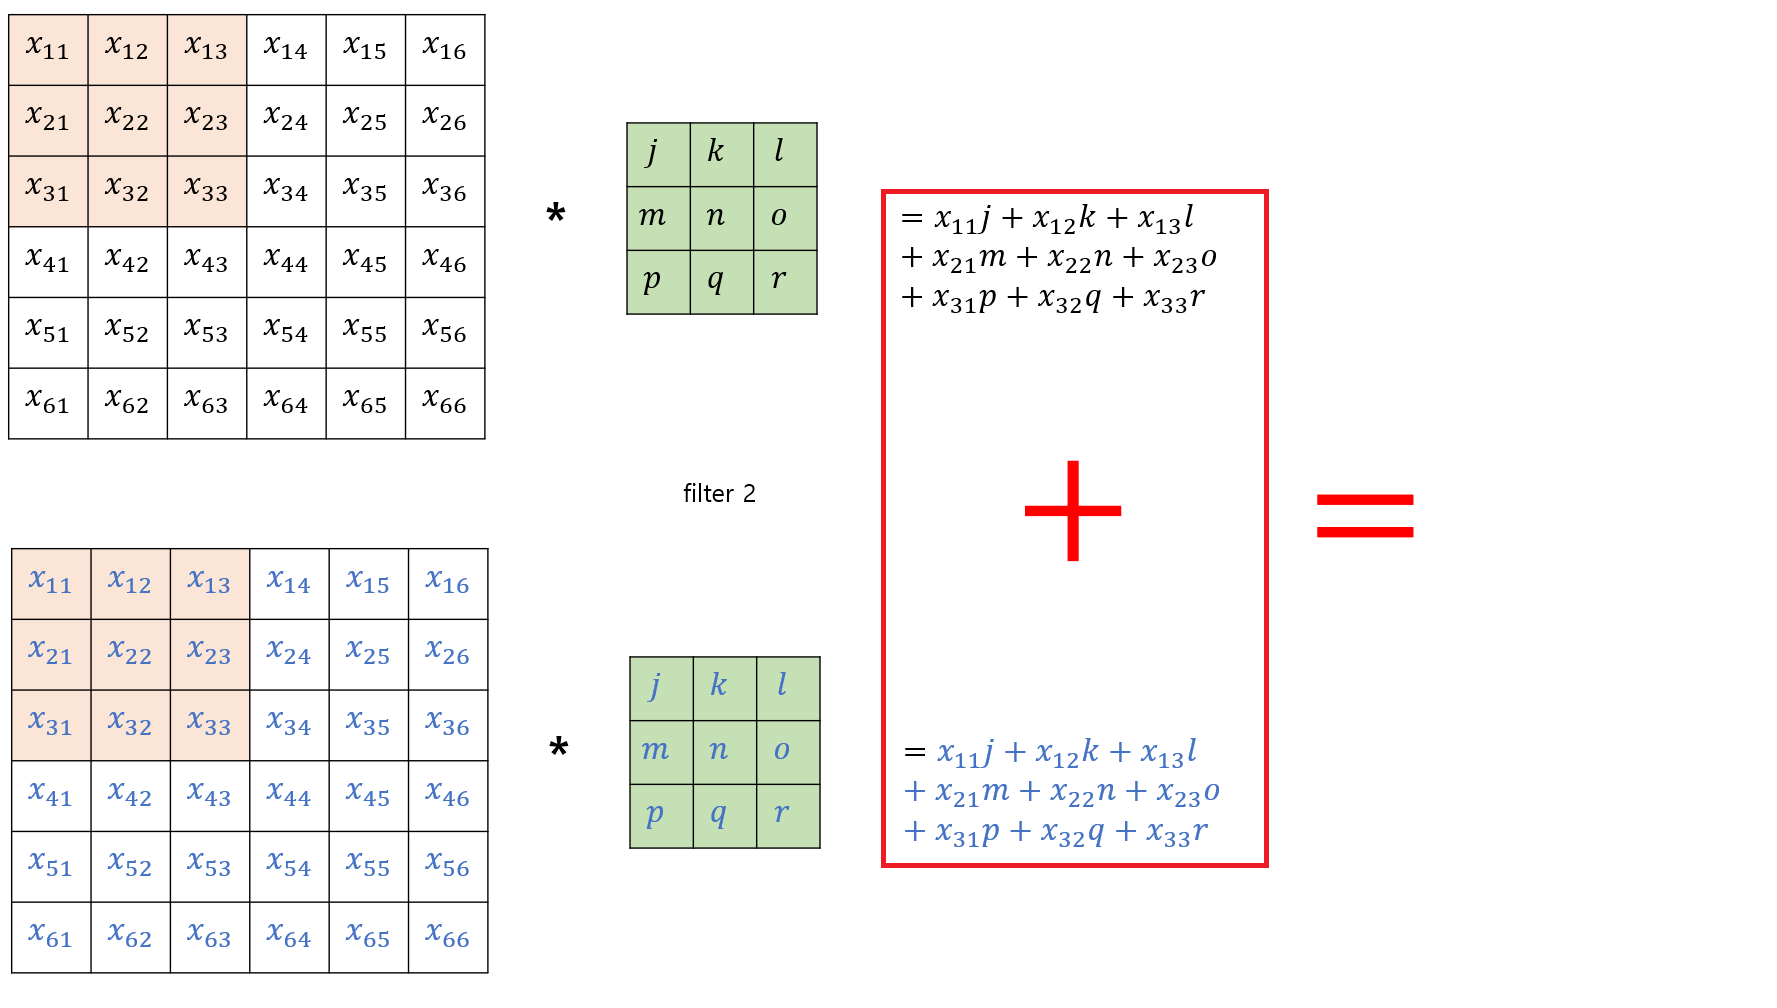

### 간단한 예제 - 3개의 채널을 갖는 입력

[`sklearn.datasets.load_sample_image`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_sample_image.html)를 이용하여 간단하게 테스트 하여 보자.

위 예제와는 다르게 해당 이미지는 3개의 채널 (RGB)을 갖는다.

In [5]:
from sklearn.datasets import load_sample_image

# Load sample images
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape
batch_size, height, width, channels

(2, 427, 640, 3)

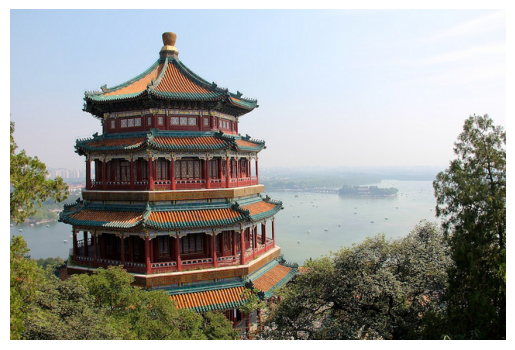

In [12]:
plt.imshow(china) 
plt.axis("off") 
plt.show()

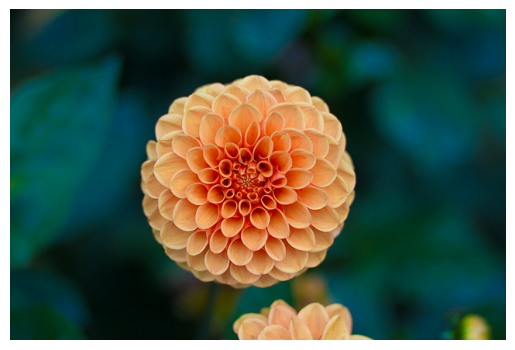

In [13]:
plt.imshow(flower) 
plt.axis("off") 
plt.show()

이제 앞서 설명한 내용을 바탕으로, 실제로 수직(vertical edge), 수평(horizontal edge)을 감지하는 필터를 만들어 적용해보자.

- 입력 데이터는 RGB 이미지와 같이 3개의 채널을 가진다고 가정한다.

- 필터 크기는 $7\times7$로 설정하며,

- 필터의 개수는 2개로 지정한다: 하나는 수직선(edge), 다른 하나는 수평선(edge)을 감지하도록 설계

In [23]:
# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)

# filters의 마지막 index가 채널의 index
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

아래에서 [```tf.nn.conv2d```](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d)는 [```tf.keras.layers.Conv2D```](https://keras.io/api/layers/convolution_layers/convolution2d/)와 거의 동일한 기능을 수행할 수 있다.

> 다만 tf.nn.conv2d는 레이어가 아닌 연산 함수이기 때문에 학습할 수 있는 모형은 아니고, 
필터(weight tensor)를 직접 정의해서 사용해야 하며, bias 처리는 별도로 해주어야 한다.

- `strides`와 `padding`는 필터가 어떻게 이동하며 연산을 수행할지를 결정하는 인자이며 이에 대해서는 나중에 살펴보겠다.

위에서 정의한 필터를 layer에 적용하여 그림 파일에 대한 결과를 살펴보자.

In [24]:
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

합성곱층 하나를 통과했을 때, 각 이미지 하나 당 $427 \times 640$ 크기의 출력(특성맵)이 2개 생성된다.

아래 shape에서 첫번째 2는 데이터의 수이고, 마지막 2는 특성맵의 수이다.

In [25]:
outputs.shape

TensorShape([2, 427, 640, 2])

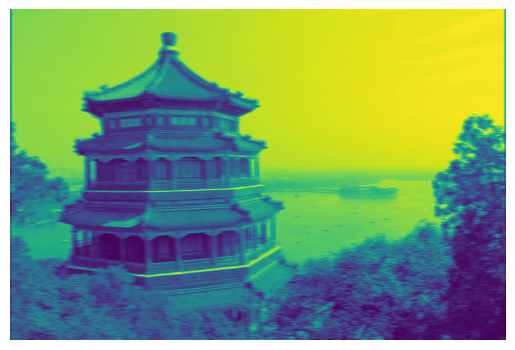

In [26]:
plt.imshow(outputs[0, :, :, 1]) # plot 1st image's 2nd feature map
plt.axis("off") 
plt.show()

In [27]:
def plot_image(image):
    plt.imshow(image,  interpolation="nearest")
    plt.axis("off")

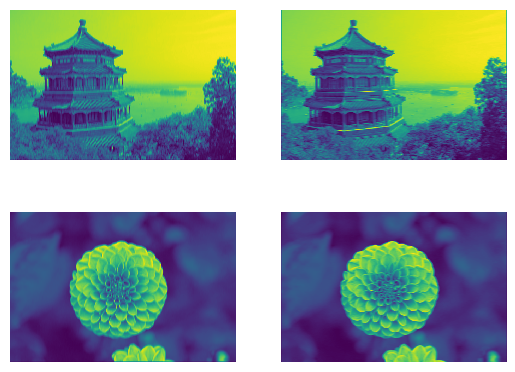

In [28]:
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plt.subplot(2, 2, image_index * 2 + feature_map_index + 1)
        plot_image(outputs[image_index, :, :, feature_map_index])

plt.show()

## Multiple feature map 정리

CNN에서 입력 이미지나 데이터는 종종 여러 개의 채널(channel)을 갖는다.
대표적인 예는 RGB 이미지로, 빨강(R), 초록(G), 파랑(B) 3개의 채널로 구성된다.

> 이미지만이 아니라, 다른 도메인의 데이터(예: 시계열, 센서, 음성 등)도 다차원 채널 구조를 가질 수 있다.


### 필터와 채널의 관계

* 입력 데이터에 여러 개의 채널이 있다면, 하나의 필터는 그 모든 채널에 각각 1개의 커널을 갖는다.
  
* 즉, 각 채널에 대해 별도로 합성곱(convolution) 연산을 수행한 후,
  
* 결과 행렬의 같은 위치에 있는 값끼리 합산한다.

* 여기에 bias 항이 있어 합산된 결과 행렬의 모든 원소에 동일하게 더해진다. (Bias는 각 필터 별로 하나씩 존재)
  
* 이 결과는 해당 필터에 의한 1개의 출력 행렬 (feature map)이다.


### 필터의 개수와 출력 구조

* `filters=K`로 설정하면, 위 과정을 K번 병렬적으로 수행하여 K개의 feature map이 생성된다.
  
* 즉, 필터 수만큼의 출력이 생기며, 이들은 합산되지 않고 나란히 유지된다.
  
* CNN의 출력 텐서는 보통 다음과 같은 shape을 갖는다:

$$
\text{(batch, height, width, filters)}
$$

여기서 마지막 차원 `filters`는 곧 **feature map의 개수이자, output의 채널 수**이다.

즉, 입력 채널이 몇 개인지에 상관없이, output의 특성 맵의 수는 오로지 filters의 개수에 의해 결정된다.

- dense layer 에서 output의 숫자는 unit의 수와 같았던 것과 비슷하다.

뉴럴 네트워크의 레이어들 사이에서 전달되는 output의 특성맵들은 결국 입력에서의 channel과 같은 역할을 한다.

- 즉, shape의 가장 마지막에 위치하며 일종의 데이터 차원을 담당.

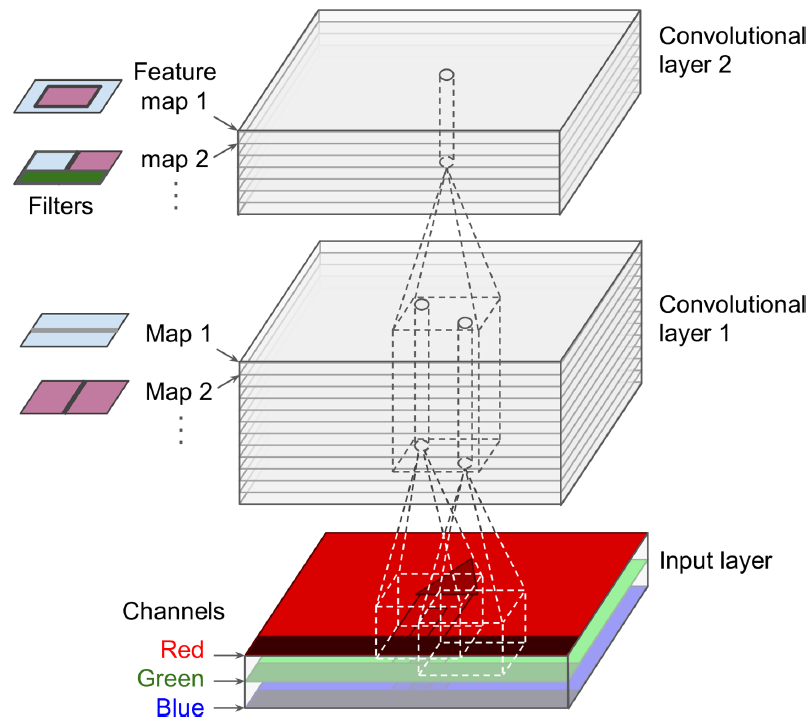

## MNIST 예제

앞에서 사용한 [MNIST](https://keras.io/api/datasets/mnist/) 데이터 셋을 이용해 보자.

In [15]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [16]:
#download mnist data and split into train and test sets
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

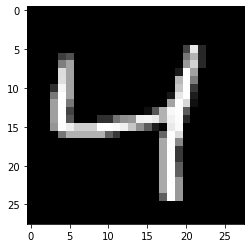

In [17]:
plt.imshow(train_images[2], cmap='gray')
plt.show()

In [18]:
train_labels[2]

4

In [19]:
train_images = train_images.reshape((60000, 28, 28, 1))  #60000개의 28*28 image, 1채널
test_images = test_images.reshape((10000, 28, 28, 1))

# 픽셀 값을 0~1 사이로 정규화
train_images, test_images = train_images / 255.0, test_images / 255.0

CNN은 배치(batch) 크기를 제외하고 (이미지 높이, 이미지 너비, 컬러 채널) 크기의 텐서(tensor)를 입력으로 받는다. 

* 그림 하나 당 3개의 차원이 존재

MNIST 데이터는 (흑백 이미지이기 때문에) 컬러 채널(channel)이 하나지만 컬러 이미지는 (R,G,B) 세 개의 채널을 가진다.

먼저 비어있는 모델을 생성하겠다.

In [20]:
#create model
model = keras.models.Sequential()

모형에 layer들을 추가하자.

이 예제에서는 MNIST 이미지 포맷인 (28, 28, 1) 크기의 입력을 처리하는 CNN을 정의한다. 

이 값을 첫 번째 층의 `input_shape` 매개변수로 전달할 것이다.

커널 크기는 $3\times3$으로 하겠다.

총 64종류의 필터(커널)를 이용하는 Convolution layer를 만들어 보겠다.

즉, 이 층에는 $3\times3$ 크기의 총 64개의 커널이 존재하고, 각 커널은 convolution 연산을 독립적으로 수행할 것이다.

따라서 아래의 [`keras.layers.Conv2D`](https://keras.io/api/layers/convolution_layers/convolution2d/) layer를 지나면 $26 \times 26 \times 64$의 output이 생성된다.

* 원래 $28\times28$의 그림이 필터를 거치면서, 위-아래-왼쪽-오른쪽에서 한 칸씩 줄어, 크기는 $26\times26$로 줄어들게 된다.

* 그리고 64개의 필터를 거치면서 64개의 특성맵 (output)이 만들어 진다.

* 특성맵은 원 데이터의 channel과 같은 역할을 한다. 특성맵의 개수가 input data의 channel과 같이 shape의 마지막 값임을 주목하라.

In [21]:
model.add(keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(28,28,1)))  

아래 코드에서 하나의 convolution layer를 더 추가하겠다.

이전 층에서 출력된 64개의 특성맵들은 각각 64개의 서로 다른 필터들과 convolution 연산을 수행한 후 하나로 합쳐진다.

* 계산된 행렬들의 동일한 위치에 있는 값들끼리 더해짐 

이러한 과정이 총 `filters=32` 만큼 병렬적으로 진행된다.

아래 layer를 지나면 $24\times24\times32$의 output이 생성된다.

In [22]:
model.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))

In [23]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='softmax'))

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 10)                184330    
                                                                 
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


<p> <font color=#00008B> &#9635 모형 가중치 </font> </p>

모형 가중치 (파라미터)들의 개수에 대해 점검해 보자.

첫번째 layer의 parameter 숫자는 다음과 같다.

* $3 \times 3$ 크기의 커널과 1개의 편향 (bias) 파라미터가 한 쌍을 이룬다. 여기서 편향은 특성맵의 밝기를 조정하는 다이얼 같은 개념이다.

* 이러한 커널/편향 조합이 총 64개가 존재한다. `filters=64`

In [25]:
# 첫번째 layer의 parameter 숫자. 3*3은 커널, 1은 편향(bias) 
(3*3 + 1) * 64

640

두번째 layer의 parameter 숫자는 다음과 같다.

* 앞 단계에서 64개의 특성맵을 내보내므로, 이들을 담당하는 $3\times 3$ 크기의 커널이 총 64개 존재한다.
* 64개의 $3\times 3$커널과 1개의 편향 파라미터가 한 쌍을 이룬다. 
* 이러한 쌍이 총 32개 있다. `filters=32`

In [26]:
# 두번째 layer의 parameter 숫자, 첫번째 layer의 총 64 종류 output 채널에 대해 각각 적용되는 커널이 존재
(3*3*64 + 1) * 32

18464

Flatten layer는 특별히 모수가 없다. ouput의 수는 다음과 같다.

In [27]:
# Flatten의 output 수
24* 24* 32

18432

마지막 Dense layer의 파라미터들의 개수는 다음과 같다.

* (입력의 숫자 + bias) $\times$ 유닛의 수

In [4]:
(18432 + 1) * 10

184330

<p> <font color=#00008B> &#9635 Layer를 생성하여 살펴보기 </font> </p>

간단하게 ```keras.layers.Conv2D```를 임시로 생성하여, 출력 결과를 대략적으로 살펴보자.

처음 2개의 레이어는 Conv2D 레이어로 2차원 행렬인 입력 이미지를 처리할 컨볼루션 레이어이다.

첫 번째 레이어의 64와 두 번째 레이어의 32는 각 레이어의 노드 수를 나타낸다. 

이 숫자는 데이터 세트의 크기에 따라 더 높거나 낮게 조정할 수 있다. 

`kernel_size`는 컨볼루션에 대한 필터 행렬의 크기이다. 따라서 커널 크기가 3이면 3x3 필터 행렬을 갖게된다. 

즉 첫 번째 레이어는 3x3 크기의 64개의 필터를 갖는다.

아래 코드에서 임시로 생성된 `keras.layers.Conv2D`에 `train_images`들을 적용해 보자.

In [28]:
temp = keras.layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1))(train_images[:2])

In [29]:
temp

<tf.Tensor: shape=(2, 26, 26, 64), dtype=float32, numpy=
array([[[[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.       

In [30]:
keras.layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1))(train_images[:1])

<tf.Tensor: shape=(1, 26, 26, 64), dtype=float32, numpy=
array([[[[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.       

모델을 컴파일할 때 타겟 값이 0부터 9까지의 정수로 이루어져 있기 때문에 (sparse category), ```sparse_categorical_crossentropy```를 loss function으로 이용한다.

In [31]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
#train the model
model.fit(train_images[:20000], train_labels[:20000], epochs=5)

Epoch 1/5
625/625 [==============================] - 13s 20ms/step - loss: 0.2242 - accuracy: 0.9336
Epoch 2/5
625/625 [==============================] - 13s 20ms/step - loss: 0.0694 - accuracy: 0.9783
Epoch 3/5
625/625 [==============================] - 13s 21ms/step - loss: 0.0425 - accuracy: 0.9870
Epoch 4/5
625/625 [==============================] - 13s 20ms/step - loss: 0.0268 - accuracy: 0.9912
Epoch 5/5
625/625 [==============================] - 13s 20ms/step - loss: 0.0188 - accuracy: 0.9938


아래 코드에서 ```result```는 softmax의 결과로 확률값이기 때문에 이를 클래스로 변환하기 위해 ```np.argmax```가 사용되었다.

In [33]:
results = model.predict(test_images[:30])
for result in results:
    print(np.argmax(result), end=" ")

1/1 [==============================] - 0s 34ms/step
7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 

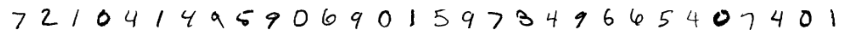

In [34]:
(original_train_images, original_train_labels), (original_test_images, original_test_labels) = keras.datasets.mnist.load_data()
fig, ax = plt.subplots(1, 30, figsize=(15,15))
for i in range(30):
    ax[i].imshow(original_test_images[i].reshape(28, 28), cmap='binary')
    ax[i].axis('off')

## 패딩과 스트라이드

Convolution filter를 적용하면, 가로와 세로가 2 칸씩 줄어들게 된다.  
* 즉, $8\times8$의 이미지가 convolution layer를 통과하면 $6\times6$의 이미지가 된다.
  
만약 이렇게 줄어드는 것이 마음에 들지 않으면, 원 이미지의 주위에, 0을 둘러서 추가할 수 있다.

그러면 원 이미지가 $10\times10$이 되므로 convolution layer를 통과하면 $8\times8$이 된다.  

이를 제로 패딩 (zero padding)이라 한다.

```keras.layers.Conv2D```에서는 ```padding = "same"```으로 두어 구현할 수 있다.

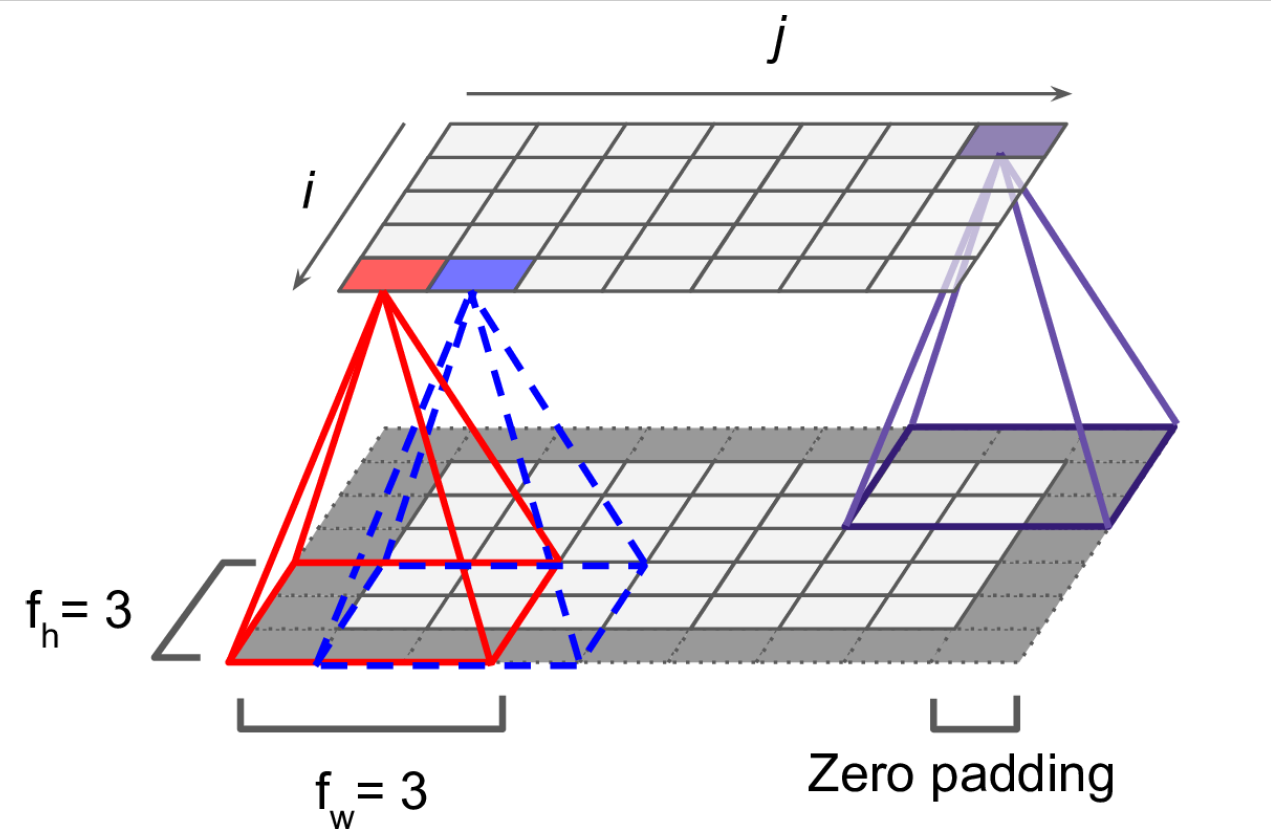

때로는 수용장 사이에 간격을 두어 입력층을 훨씬 작은 출력으로 변환할 수도 있다.  

이 간격을 스트라이드 (stride)라고 한다.

이렇게 하면 모형의 계산 복잡도를 낮출 수 있다.

```keras.layers.Conv2D```에서는 ```strides``` 인자에 두 정수를 가지는 tuple이나 리스트를 입력한다. 

* 튜플이나 리스트의 각 정수는 높이와 너비에 대한 stride 값을 나타낸다.

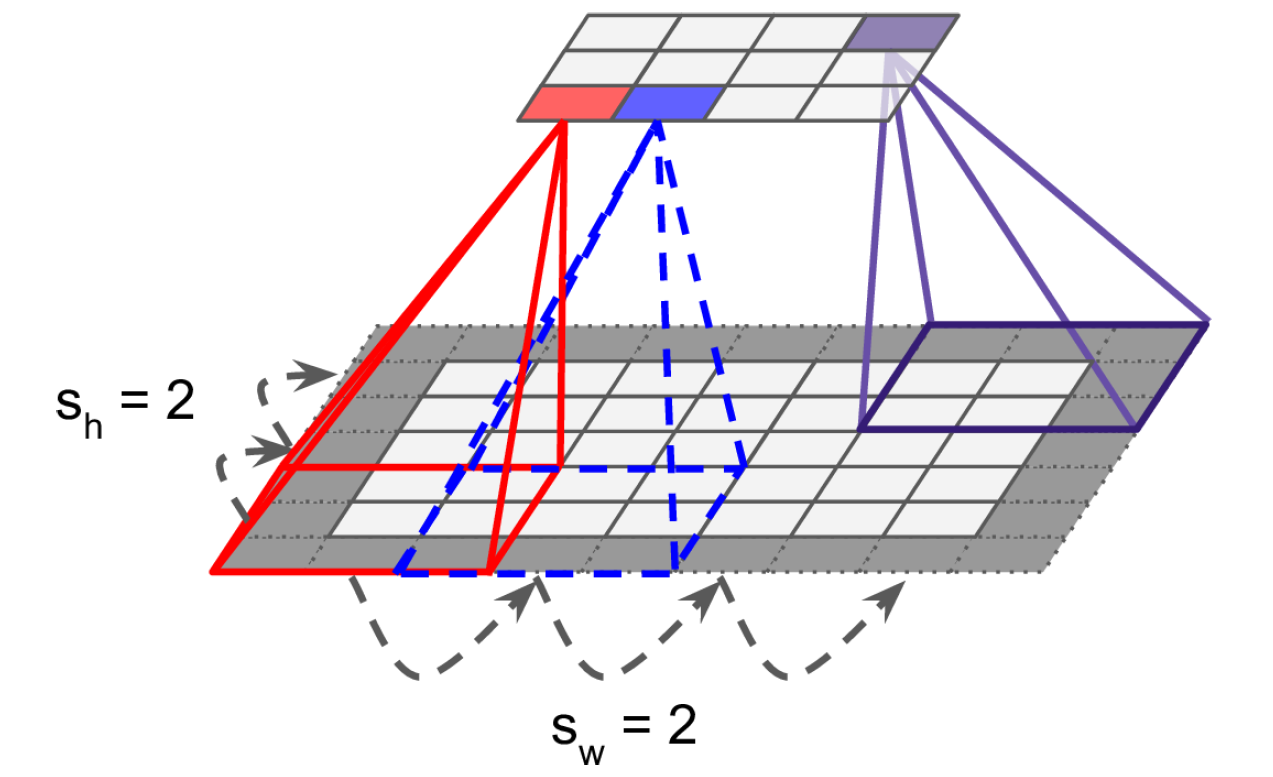

예를 들어 다음과 같은 모형을 생각할 수 있다.

In [35]:
model_modified = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding = "same", input_shape=(28,28,1)),
    keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', strides = (2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units = 10, activation="Softmax")
])

In [36]:
model_modified.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 32)        18464     
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                54090     
                                                                 
Total params: 73,194
Trainable params: 73,194
Non-trainable params: 0
_________________________________________________________________


In [37]:
# 3 채널 이미지
images[0].shape

(427, 640, 3)

In [38]:
keras.layers.Conv2D(filters=5, kernel_size=3, input_shape=images[0].shape)(images[:1]).shape

TensorShape([1, 425, 638, 5])

## 풀링 층

풀링 층은 계산량과 메모리 사용량, 파라미터 수를 줄이기 위해 입력 이미지의 subsample을 만드는 것이다.

즉, 풀링 층은 이미지의 크기를 줄이면서도 중요한 정보는 유지하기 위해 사용되는 도구이다.

이는 과대적합 (overfitting) - 너무 많은 정보로 인한 문제 - 의 위험을 줄여준다. 

풀링 뉴런은 가중치가 따로 없고, 최대나 평균 같은 합산 함수를 이용해 입력값을 더한다.

[```MaxPool2D```](https://keras.io/api/layers/pooling_layers/max_pooling2d/) ([```MaxPooling2D```](https://keras.io/api/layers/pooling_layers/max_pooling2d/)), [```AvgPooling2D```](https://keras.io/api/layers/pooling_layers/average_pooling2d/) 등이 있다.

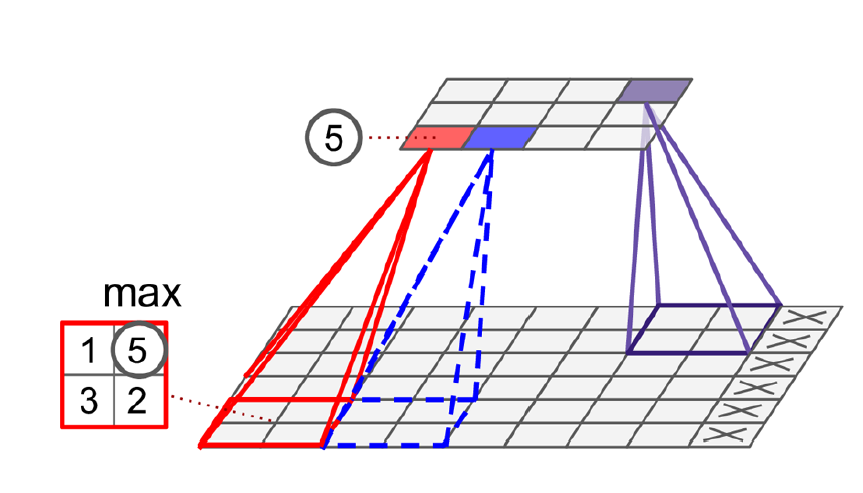

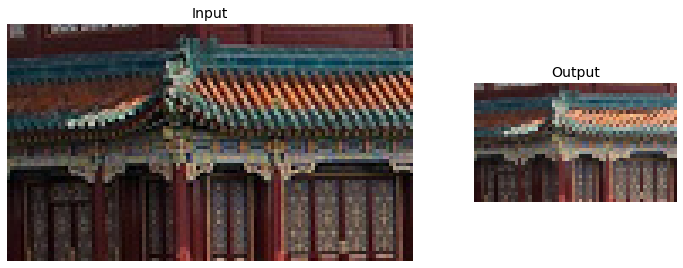

In [39]:
import matplotlib as mpl


def crop(images):
    return images[150:220, 130:250]


max_pool = keras.layers.MaxPool2D(pool_size=2)
cropped_images = np.array([crop(image) for image in images], dtype=np.float32)
output = max_pool(cropped_images)
fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(cropped_images[0])  # plot the 1st image
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output", fontsize=14)
ax2.imshow(output[0])  # plot the output for the 1st image
ax2.axis("off")
plt.show()

In [40]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))

In [41]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-trai

In [42]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [43]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

In [44]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1435 - accuracy: 0.9549
Epoch 2/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0463 - accuracy: 0.9856
Epoch 3/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0334 - accuracy: 0.9893
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0244 - accuracy: 0.9928
Epoch 5/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0203 - accuracy: 0.9937


In [45]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.0301 - accuracy: 0.9918 - 1s/epoch - 3ms/step


In [46]:
print(test_acc)

0.9918000102043152


##  CNN 구조

전형적인 CNN 구조는 합성곱 층을 몇 개 쌓고, 각각 ReLu 층을 그 뒤에 두고, 그 다음에 풀링층을 쌓고, 그 다음에 또 합성곱 층을 몇 개 더 쌓고 그 다음에 풀링 층을 다시 쌓는 식이다.

네트워크를 통과할수록 이미지는 작아지지만 합성곱 층 때문에 일반적으로 점점 깊어져 더 많은 특성 맵을 지닌다.

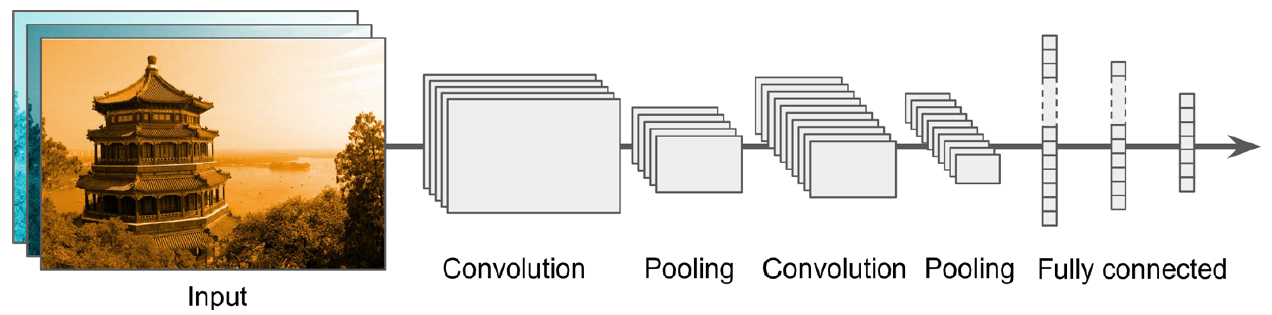

지난 몇년간 이 기본구조에서 많은 변종이 개발되어 많은 성과를 이끌어 냈다.

대표적으로는 LeNet-5 구조, AlexNet, GoogLeNet, ResNet 등이 있다.

In [47]:
## 예제 코드

model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation="relu", padding="same", input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

### AlexNet 2012

AlexNet은 2012 ImageNet LSVRC-2012 대회에서 큰 성과를 거두며 우승한 것으로 유명하다.

이 인공신경망은 ReLU, dropout, pooling 등의 기술을 이용하여 성능 향상을 꾀했다.

이전의 모형에 비해 더 많은 층을 쌓고, 더 많은 파라미터 (60M)를 이용하여, 당시 기술로 1주일 이상을 학습하여 좋은 성과를 보였다.

### GoogLeNet 2014

GoogLeNet은 AlexNet보다 더 많은 층 (22개의 convolution layer)을 이용하면서도, 파라미터의 수는 크게 줄였다. (7M)

이 인공신경망은 convolutional neural network를 병렬적으로 연결한 개념인 inception을 사용하여 크게 파라미터의 수를 줄였다.

### ResNet 2015

네트워크 층을 많이 쌓으면 성능이 향상되기는 하지만, 무조건 많이 쌓는다고 좋은 결과를 얻는 것은 아니었다.

층이 많이 쌓이면 그레디언트 소실과 같은 문제가 발생할 수 있다.

ResNet는 신호를 전달할 때, 층을 통과하며 변환된 값들 뿐만 아니라, 원본 정보를 같이 후속 layer들에 전달함으로써 정보의 손실을 막았다.

ResNet 혹은 그 이후에 개발된 이미지 처리 인공 신경망은 인간의 능력과 비슷하거나 더 향상된 성능을 보인다고 평가된다.  